# Setup

Imports:

In [292]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

Let us read the csv file:

In [430]:
df = pd.read_csv('telco_customer_churn.csv')

# Data preprocessing

In order to see all columns without hiding some of them for compact view, let us make the following settings:

In [146]:
pd.set_option("display.max_columns", None)

Then, let us take a look at the first five rows:

In [147]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Then at the last five rows:

In [148]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Let us check some additional information:

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [150]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

It looks import was complete, all 7043 rows are read from the csv file. There are 21 columns and there are no NaN values.

#### Check for erroneous values

In [151]:
df['customerID'].value_counts()

1534-OULXE    1
8739-XNIKG    1
9136-ALYBR    1
7577-SWIFR    1
9822-BIIGN    1
             ..
7503-ZGUZJ    1
6302-JGYRJ    1
1579-KLYDT    1
7943-RQCHR    1
4098-NAUKP    1
Name: customerID, Length: 7043, dtype: int64

All customerIDs are unique, there are no duplicates among the data set.

Let us check the unique values of the different columns, so we can see whether they contain any '?', ' ' or other placeholders.

In [152]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [153]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [154]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [155]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [156]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [157]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [16]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [17]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [18]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [19]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [20]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [21]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [22]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [158]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [24]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [159]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

MonthlyCharges has too many unique values to check. Let us convert its values to numeric, and use the 'coerce' error: set the value as NaN and then count them.

In [160]:
mask = pd.to_numeric(df['MonthlyCharges'], errors='coerce').isna()
a = mask.sum()
print(a)

0


There are only numbers in the MonthlyCharges column.

In [161]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [431]:
mask = pd.to_numeric(df['TotalCharges'], errors='coerce').isna()
a = mask.sum()
print(a)

11


TotalCharges column, however, contains 11 string values. Let us take a look at these lines.

In [432]:
df.loc[pd.to_numeric(df['TotalCharges'], errors='coerce').isna() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


As we can see, there is only a space ' ' in case of these 11 values. Since there are only 11 rows out of the 7043, less than 0.02%, we can simply leave these rows out. Alternatively, we could impute 0 values.

In [433]:
df_no_missing = df.loc[pd.to_numeric(df['TotalCharges'], errors='coerce').isna() == False]

In [434]:
df_no_missing.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [165]:
len(df_no_missing)

7032

We work with the 7043-11=7032 rows from now on. Last but not least, take a look at the Churn column as well.

In [505]:
df_no_missing['Churn'].unique()

array(['No', 'Yes'], dtype=object)

It contains only Yes and No what is good for us.

Let us see the target variable (Churn) distribution:

In [169]:
ChurnCount = df_no_missing["Churn"].value_counts()
ChurnCount

No     5163
Yes    1869
Name: Churn, dtype: int64

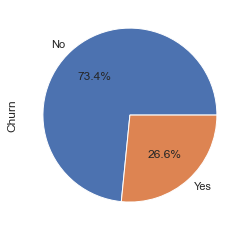

In [557]:
sns.set(rc={'figure.figsize':(6,4)})
ax = ChurnCount.plot.pie(autopct="%.1f%%")

We can see that the data set is imbalanced, there are almost three times more active customers (Churn = No), compared to the churned customers.

# Exploratory analysis

After we have made sure our data is well-prepared, let us explore and visualize them for better understanding.

For the visualization of continuous data, I have chosen the KDE (Kernel Density Estimate) plot type. In the following visualizations we can see the data distribution (like in case of a histogram: e.g. are all age groups represented, is it similar to real life?) and the churn ratio at the same time (for example we can see whether people are more likely to leave the service at an early phase, after several months or tenure does not influence churn at all).

If we analyze the plots, we can have an impression which are the more important features and which are less relevant (at least on their own). Let us go through all the continuous data first.

## Analysis of continuous data

In [577]:
def kdeplot(feature):
    plt.figure(figsize=(8, 4))
    plt.rcParams['axes.facecolor'] = 'white'
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df_no_missing[df_no_missing['Churn'] == 'No'] [feature], color= 'navy',   label= 'churn: No')
    ax1 = sns.kdeplot(df_no_missing[df_no_missing['Churn'] == 'Yes'][feature], color= 'orange', label= 'churn: Yes')
    plt.legend(loc='upper right')

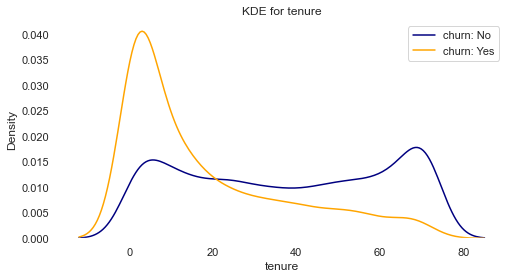

In [578]:
kdeplot('tenure')

It looks like tenure is a very important feature: people in the first months tend to leave the service, while churn significantly decreases with time. The distribution looks realistic, there are more people with fewer months but loyal customers are represented as well.

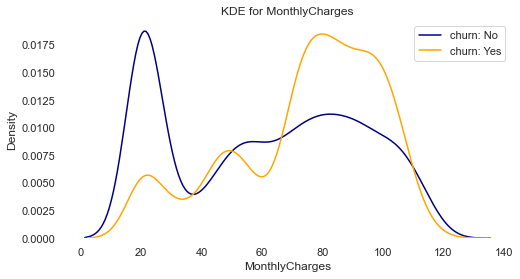

In [574]:
kdeplot('MonthlyCharges')

Monthly charges seems to be an important feature as well: if monthly charges are low, people stay in the service, while the rise the monthly charges cause higher churn ratio.

In [580]:
df_no_missing['TotalCharges'] = df_no_missing['TotalCharges'].astype('float64')

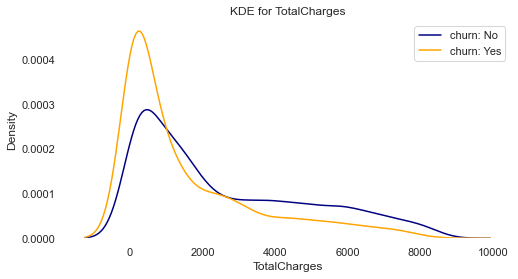

In [581]:
kdeplot('TotalCharges')

Total charges seems to be a relevant feature in churn prediction: if total charges are low (customer is new), churn ratio is high, while in case of high total charges (customer has been here for a while), churn ratio is lower. This behavior is the same as in case of the tenure. However, total charges can be high because of high monthly charges as well and as we have seen it, high monthly charges cause high churn. This counterproductive effect can be seen if we compare TotalCharges with tenure. The difference between churned and unchurned customers is smaller. Total charges is the combination of tenure and monthly charges, but the effect of tenure is more dominant.

## Analysis of categorical features

In [652]:
def barplot_ratios(feature, axis_name="ratio of customers"):
    plt.figure(figsize=(10, 6), dpi=60)
    ratios = pd.DataFrame()
    g = df_no_missing.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df_no_missing)
    ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g)
    plt.legend(loc='upper right')
    ax.plot()

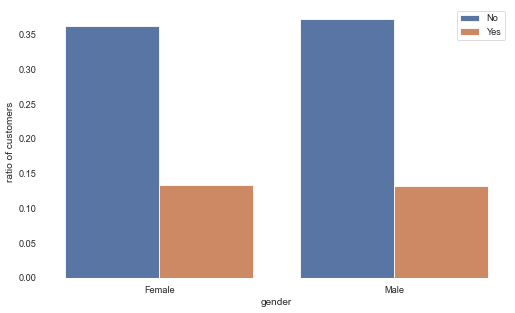

In [653]:
barplot_ratios('gender')

Gender does not seem to be an important feature. Both female and male customers churn with almost the same probability.

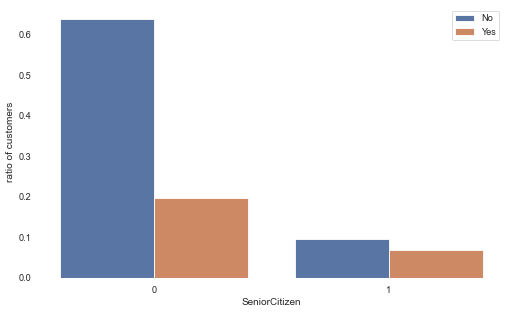

In [654]:
barplot_ratios('SeniorCitizen')

At first glance, senior citizen seems to be an important feature. Churn increases among elder people (SeniorCitizen=1). There are less senior citizen in our dataset, but this might be the case in real life as well.

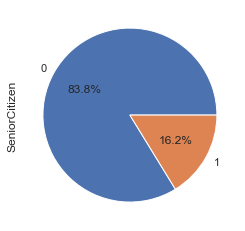

In [598]:
ax = df_no_missing["SeniorCitizen"].value_counts().plot.pie(autopct="%.1f%%")

In [586]:
def count_by_group(data, feature, target):
    df = data.groupby([feature, target])[target].agg(['count'])
    temp = data.groupby([feature])[target].agg(['count'])
    df['pct'] = 100*df.div(temp, level = feature).reset_index()['count'].values
    return df.reset_index()

In [587]:
count_by_group(df, feature = 'SeniorCitizen', target = 'Churn')

,SeniorCitizen,Churn,count,pct
0,0,No,4508,76.393832
1,0,Yes,1393,23.606168
2,1,No,666,58.318739
3,1,Yes,476,41.681261


In the table above, we can see that there are more than 1000 senior citizen in our data, so it is representative. We do not make judgement based on the behavior of only a couple of seniot citizen.

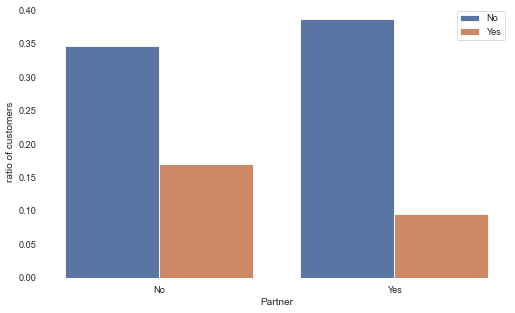

In [655]:
barplot_ratios('Partner')

Partner seems to be kind of an important feature: customers without a partner churn more often.

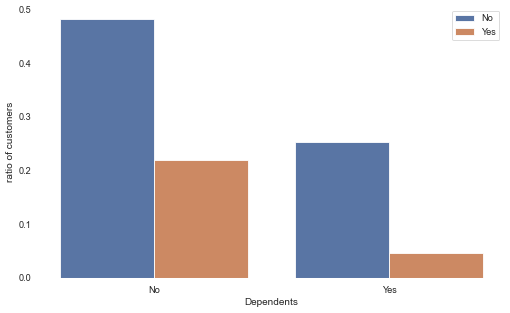

In [656]:
barplot_ratios('Dependents')

Dependents is also an important feature: if a customer does not have any dependents, he or she tends to churn with a higher probability.

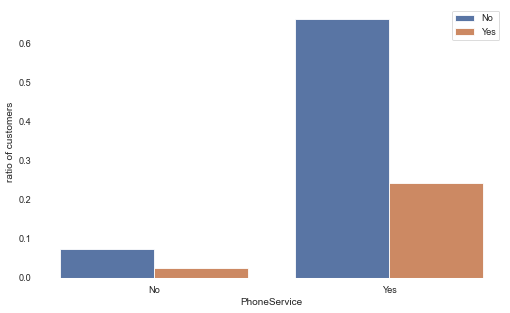

In [657]:
barplot_ratios('PhoneService')

Phone service seems to be a less relevant feature.

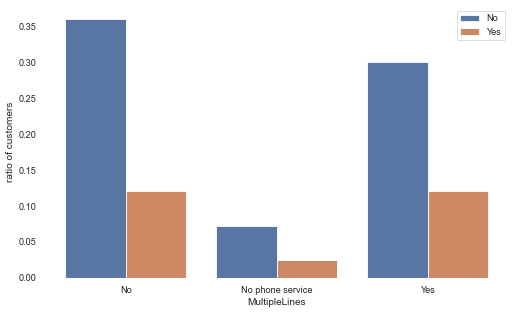

In [658]:
barplot_ratios('MultipleLines')

Multiple lines is also not among the most important features. There is no significant change in churn ratio whether a customer has multiple lines or not or does not even have phone service.

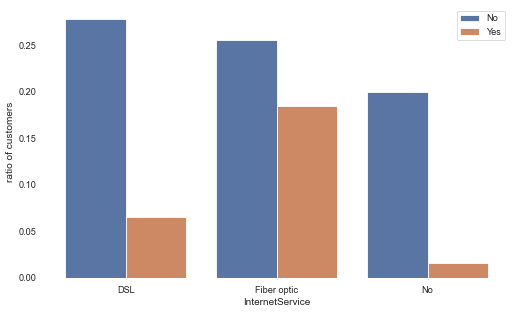

In [659]:
barplot_ratios('InternetService')

However, there are bigger changes in churn ratio if we take internet service into consideration.

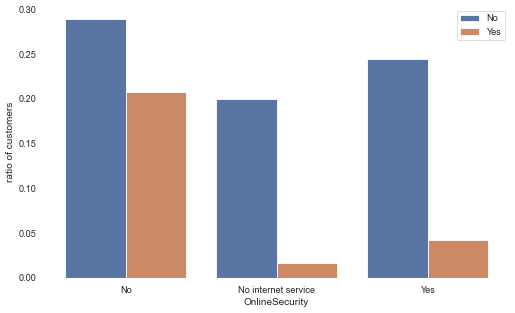

In [660]:
barplot_ratios('OnlineSecurity')

Online security is also an important feature.

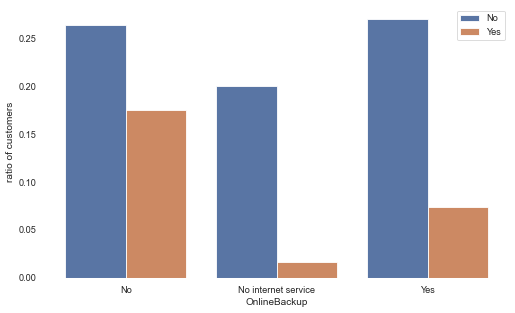

In [661]:
barplot_ratios('OnlineBackup')

Online backup is also important.

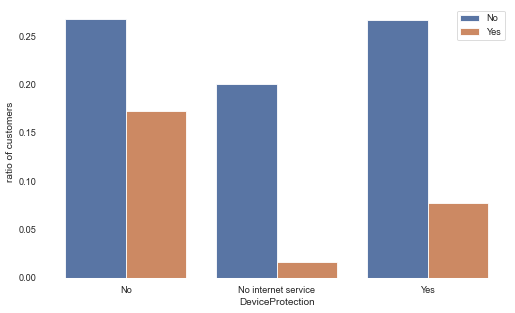

In [662]:
barplot_ratios('DeviceProtection')

Device protection is also important. The most distinguishing fact is, however, whether a customer has internet service or not.

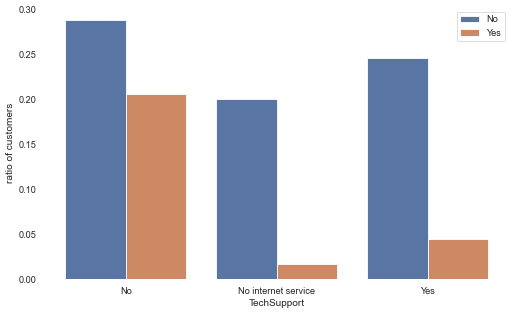

In [663]:
barplot_ratios('TechSupport')

Tech support is also important.

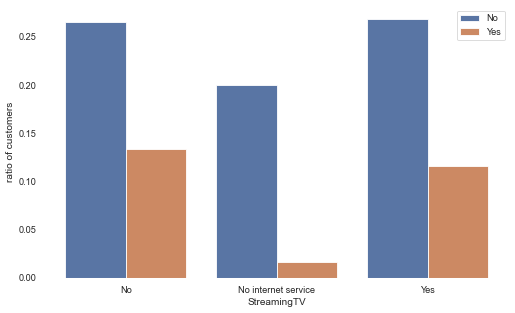

In [664]:
barplot_ratios('StreamingTV')

Streaming TV is also kind of important. Having internet, however, is the most important fact here as well.

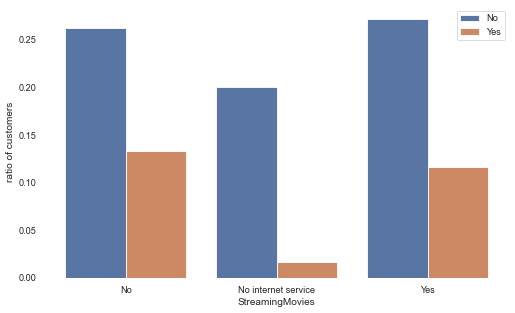

In [665]:
barplot_ratios('StreamingMovies')

Streaming movies is also kind of important. Having internet, however, is the most important fact here as well.

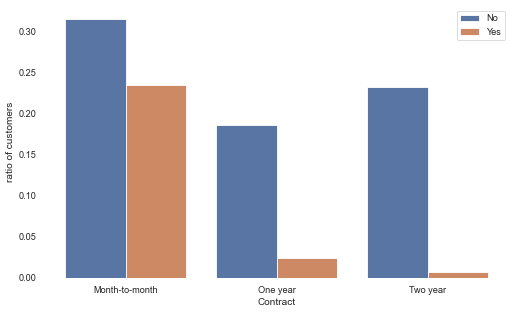

In [666]:
barplot_ratios('Contract')

Contract is a very important feature: if a customer has longer contract periods (more devoted), churn ratio drops significantly.

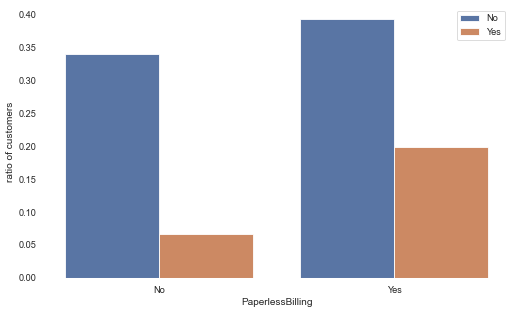

In [667]:
barplot_ratios('PaperlessBilling')

Paperless billing has moderate but visible effect: if someone chooses paperless billing, he or she tends to churn with a higher probability.

In [627]:
def barplot_ratios_large(feature, axis_name="ratio of customers"):
    plt.rcParams['axes.facecolor'] = 'white'
    plt.figure(figsize=(9, 5), dpi=80)
    ratios = pd.DataFrame()
    g = df_no_missing.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df_no_missing)
    ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g)
    plt.legend(loc='upper right')
    ax.plot()

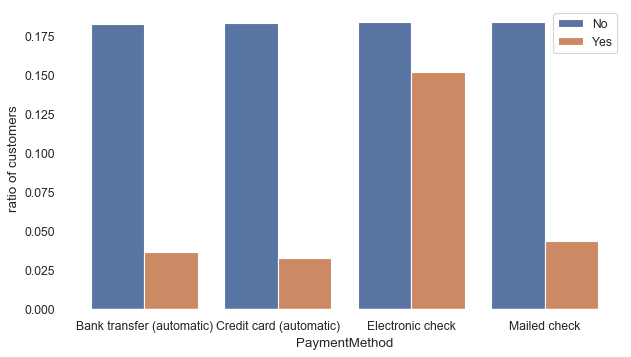

In [628]:
barplot_ratios_large('PaymentMethod')

Payment method is also important: in case of electronic check, churn ratio increases significantly.

## Split data into features and target variables

The 'customerID' column does not contain relevant information for churn prediction, so we can eliminate it.

In [435]:
df_no_missing = df_no_missing.drop('customerID', axis=1)

Let us denote the features with 'X' and the target ('Churn') with y.

In [436]:
X = df_no_missing.drop('Churn', axis=1).copy()
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [506]:
y = df_no_missing['Churn'].copy()
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

Let us change the Yes/No values of the target variable to zeros and ones with pandas factorize.

In [507]:
y, _ = pd.factorize(y)
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

Let us take a look at our features:

In [439]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


The type of the 'TotalCharges' column is still object, although we removed all string values. Let us change its type to float 64.

In [440]:
X['TotalCharges'] = X['TotalCharges'].astype('float64')

We have 16 categorical features and 3 numerical columns ('tenure', 'MonthlyCharges', 'TotalCharges'). 6 of the 16 categorical features ('gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling') have only binary values (e.g. Female/Male or Yes/No). In these 6 cases, it is enough to replace the values with 1 and 0 with pandas.factorize. In the other 10 cases of the categorical features, however, we need to create separate columns for each values with pandas.get_dummies. With the numerical features, we will work a little later.

In [441]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

In [442]:
X_categorical = X[categorical_columns].copy()

In [443]:
for column in categorical_columns:
    if X_categorical[column].nunique() == 2:
        X_categorical[column], _ = pd.factorize(X_categorical[column])
    else:
        X_categorical = pd.get_dummies(X_categorical, columns=[column])

X_categorical.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


Now, let us take a look at the numerical columns.

In [444]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

As we discussed earlier, the numerical features have a wide range of distribution. This can be seen if we use pandas describe().

In [445]:
X[numerical_columns].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Probably, it is easier to see this on the histograms, if we check the range of the horizontal axis. In case of TotalCharges, this value can be more than 100 times bigger than in other cases.

In [668]:
def histplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.rcParams['axes.facecolor'] = 'white'
    plt.title("Distribution for {}".format(feature))
    ax = sns.histplot(frame[feature], color = color)

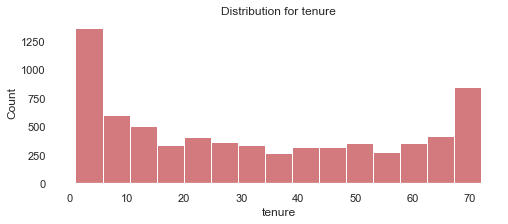

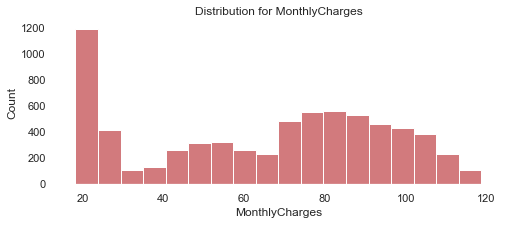

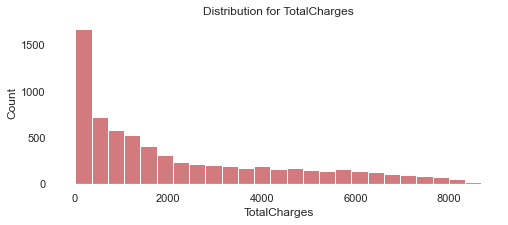

In [669]:
for feat in numerical_columns: histplot(feat, X)

It is worth standardizing all of our numeric columns before using machine learning models in order to avoid bias. If we take a look at the histograms now, we can see that the range of the features are much closer to each other. This will result in better churn prediction.

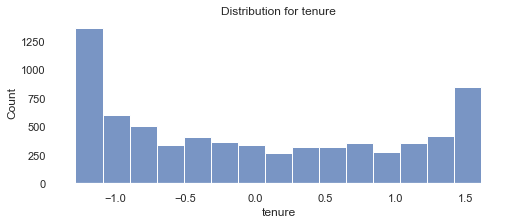

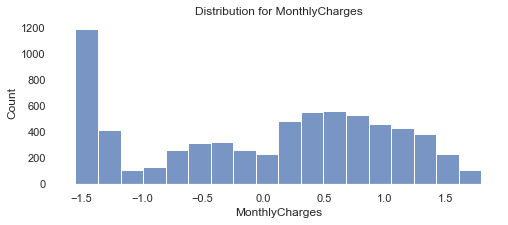

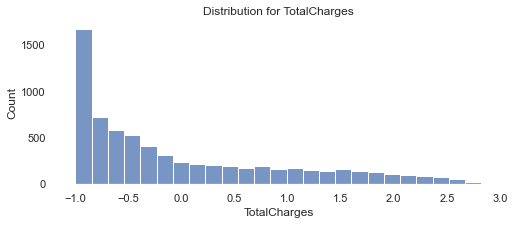

In [670]:
X_std = pd.DataFrame(StandardScaler().fit_transform(X[numerical_columns].astype('float64')),
                       columns=numerical_columns)
for feat in numerical_columns: histplot(feat, X_std, color='b')

After the standardization of the numeric values, we need to remerge them with all the other columns. However, without resetting the indexes, pandas concat resulted in NaN values.

In [447]:
X_std.reset_index(drop=True, inplace=True)
X_categorical.reset_index(drop=True, inplace=True)

In [448]:
X_processed = pd.concat([X_std, X_categorical], axis=1)

## Correlation heatmap

After the manual evaluation, as a next step, we can take a look at the correlations calculated by pandas. For a better visualization, a heatmap can help us.

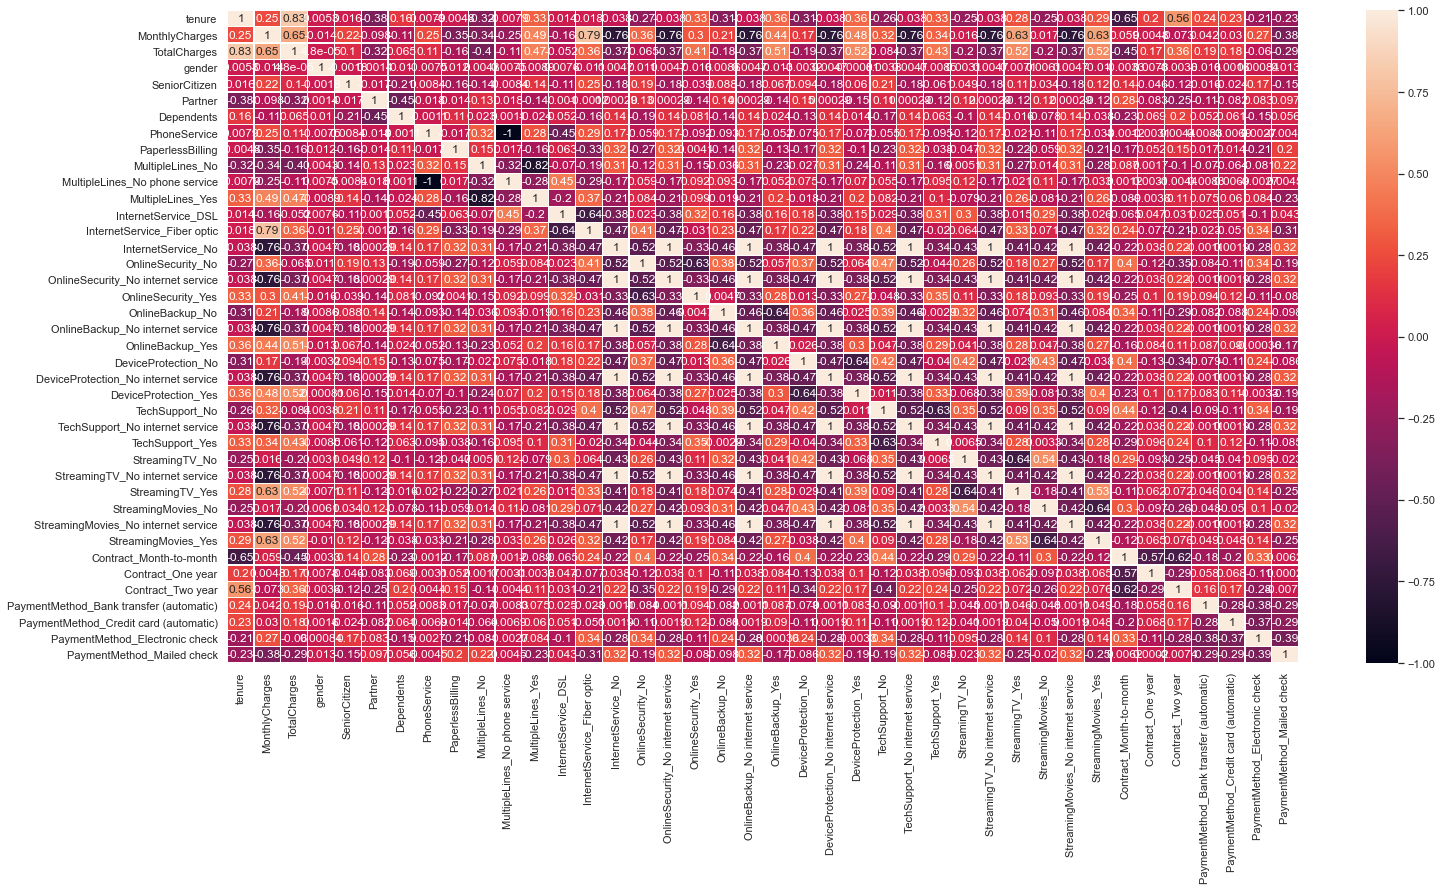

In [214]:
plt.figure(figsize=(24, 12))
corr = X_processed.corr()
ax   = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, annot=True)

Both positive and negative correlations to churn (see last column) are important for us. If a feature has a correlation of let us say 0.25 or above or -0.25 and below, it is important; if its absolute value is between 0.1 and 0.25, it has medium importance and if the correlation is lower, it is not an important feature.

According to the heatmap, many of the most important features come from the one hot encoding where customer does not have internet: InternetService_No (0.32), OnlineSecurity_No internet service (0.32), OnlineBackup_No internet service (0.32), DeviceProtection_No internet service (0.32), TechSupport_No internet service (0.32), StreamingTV_No internet service (0.32), StreamingMovies_No internet service (0.32). Others are like MonthlyCharges (-0.38) or PaymentMethod (electronic check has -0.39 score)

The least important features are PhoneService (0.004), MultipleLines_No phone service (0.004), gender (0.013) and Contract (0.006, 0.0002, 0.007).

This is very similar to the conclusions what we drew through our manual analysis previously.

## Feature importances using Random Forest Classifier

Let us use Random Forest Classifier to check feature importance. This algorithm has quick results and might give us useful information. The number of trees in the forest can be 5000 and the maximum depth of the tree is 8. Altering these values might result in a slightly different order, but we can definitely decide which feature belongs to which category of importance.

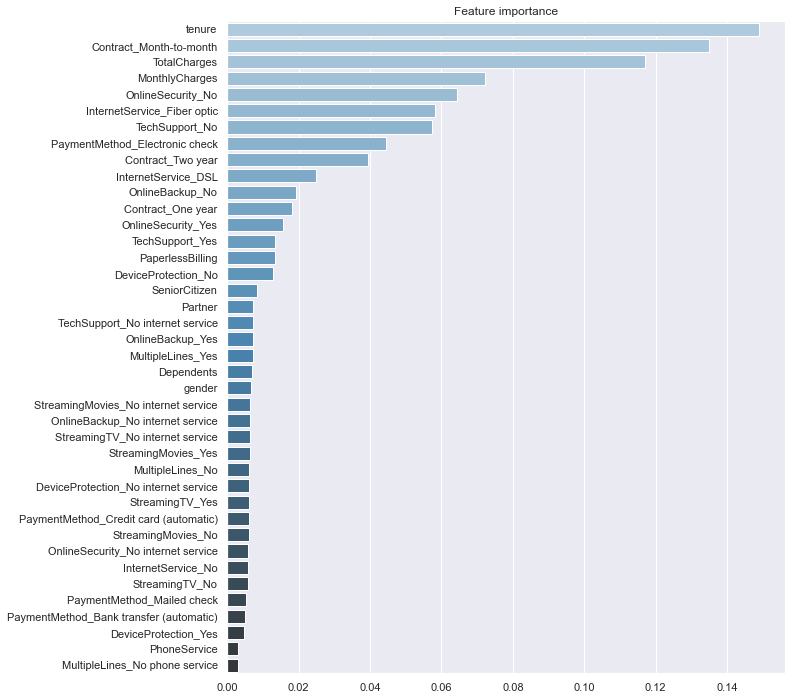

In [449]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}

x, y = X_processed, y
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

We have a little different top and last 5 list of features: the most important ones are tenure, Contract_Month-to-month, TotalCharges, MonthlyCharges, OnlineSecurity_No and the least importants are MultipleLines_No phone service, PhoneService, DeviceProtection_Yes, PaymentMethod_Bank transfer (automatic) and PaymentMethod_Mailed check.
It is important to notice that all the No internet service features that performed well in the correlation heatmap, not necessarily got good results by the Random Forest Classifier.

# Generate training and test datasets

As a next step, we need to devide the dataset into training and test sets in order to validate our model in a dataset in has never seen before. Let us make this split in 80%-20% ratio. We can also use the stratify parameter to keep the same ratios as in the whole dataset.

In [450]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, stratify=y, test_size = 0.2, random_state = 0)

# Model selection

Predicting churn is a binary classification problem. Customers either leave or stay at the service. For model selection, let us compare the following classification algorithms:

* Logistic Regression
* SVC (Support Vector Classifier)
* Kernel SVM (SVC with Radial Basis Function kernel)
* KNN (K-Neighbors Classifier)
* Gaussian NB (Naive Bayes)
* Decision Tree Classifier
* Random Forest Classifier

In [451]:
models = []

According to scikit-learn.org, for small datasets, ‘liblinear’ is a good choice as a solver. Since we have only 1000 customers, this can be good for us. Furthermore, when the class_weights = ‘balanced’, the model automatically assigns the class weights inversely proportional to their respective frequencies. This helps us to in giving higher weights to the minority class and lower weights to the majority class.

In [452]:
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))

According to scikit-learn.org, https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html, RBF is especially useful when the data-points are not linearly separable. We can try both linear and rbf kernel.

In [453]:
models.append(('SVC',        SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf',    random_state = 0)))

KNN (KNeighborsClassifier) is a non-parametric, lazy learning algorithm. Let us use the default values (number of neighbors is 5, the metric is minkowski, and with p=2 it is equivalent to the standard Euclidean metric.)

In [454]:
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))

A Gaussian Naive Bayes algorithm is a special type of NB algorithm. It's specifically used when the features have continuous values. It's also assumed that all the features are following a gaussian distribution i.e, normal distribution. We have seen that not all of our data follows gaussian distribution, but we can give it a try.

In [455]:
models.append(('Gaussian NB', GaussianNB()))

Entropy criterion is more complex than Gini index, but for our 1000 rows, the computational time is not expected to be big anyway. 

In [456]:
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))

Random Forest Classifier fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting /scikit-learn.org/. Criterion can be again entropy and the number of trees in the forest can be the default 100.

In [457]:
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))

Classification accuracy is a common metrics for evaluation, however, not the best one if we have class imbalance. As we have seen earlier, the imbalance is almost 3 to 1, only 27.4% of the sample are customers who churned within last month. A better metrics is Mean AUC (Area Under Curve), which shows how well the model can discriminate between positive and negative classes. As further metrics, let us examine precision, recall and f1.

Let us use the following notations: 
* TP (true positive)
* FP (false positive)
* TN (true negative)
* FN (false negative)

Our metrics can be calculated as follows:
* precision = TP/(TP+FP)
* recall    = TP/(TP+FN)
* accuracy  = (TP+TN)/(TP+FP+FN+TN)
* F1        = 2*precision*recall/(precision+recall)

In [458]:
auc_results = []
acc_results = []
prec_results= []
rec_results = []
f1_results  = []
names       = []
# let us summarize the results in a table with the following columns:
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD', 'Precision Mean', 'Precision STD',
       'Recall Mean', 'Recall STD', 'f1 Mean', 'f1 STD']
model_results = pd.DataFrame(columns=col)
i = 0

k-fold cross-validation can be very useful for us with our 7032 rows of data. This way we can use all data for training. Let us choose the number of folds to be 10. This way 1 fold is for validation and 9 is for training, and then the 1 validation fold is changed for another.

In [459]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    auc_results.append(cv_auc_results)
    
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    acc_results.append(cv_acc_results)
    
    # precision scoring:
    cv_prec_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision')
    prec_results.append(cv_prec_results)
    
    # recall scoring:
    cv_rec_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    rec_results.append(cv_rec_results)
    
    # f1 scoring:
    cv_f1_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
    f1_results.append(cv_f1_results)
    
    names.append(name)
    model_results.loc[i] = [name,
                            round(cv_auc_results.mean()*100, 2),
                            round(cv_auc_results.std()*100, 2),
                            round(cv_acc_results.mean()*100, 2),
                            round(cv_acc_results.std()*100, 2),
                            round(cv_prec_results.mean()*100, 2),
                            round(cv_prec_results.std()*100, 2),
                            round(cv_rec_results.mean()*100, 2),
                            round(cv_rec_results.std()*100, 2),
                            round(cv_f1_results.mean()*100, 2),
                            round(cv_f1_results.std()*100, 2),
                           ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD,Precision Mean,Precision STD,Recall Mean,Recall STD,f1 Mean,f1 STD
0,Logistic Regression,84.29,1.40,74.72,1.97,51.58,3.84,80.48,2.81,62.77,3.10
1,SVC,83.26,1.29,79.79,1.87,64.78,3.53,52.80,3.11,58.08,2.27
6,Random Forest,82.42,1.65,79.18,1.55,63.94,4.15,49.96,3.31,55.95,2.46
4,Gaussian NB,81.70,1.56,69.63,1.37,46.06,3.05,84.32,2.89,59.50,2.80
2,Kernel SVM,79.09,1.66,80.27,1.79,67.76,4.42,49.34,3.31,56.99,2.81
3,KNN,77.98,1.79,76.20,1.64,55.62,3.97,52.21,4.12,53.70,2.70
5,Decision Tree Classifier,65.72,2.71,73.24,2.31,49.66,4.09,49.10,5.54,49.22,3.93


The result of the 7 algorithms can be seen in the descending order of the AUC mean, our main metrics.

For KNN and Random Forest, it would be worth finding the optimal number of K neighbors and Trees, respectively. However, due to lack of time the best result from the first iteration is accepted. Not only in case of the ROC metrics is Logistic Regression the best, but it performs well in other metrics too. For example with recall and f1, but in general it has the best values. We will work further with the Logistic Regression.

# Model evaluation

Let us evaluate our model on the so far separated test data.

In [460]:
classifier = LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')
classifier.fit(X_train, y_train)

# Predict the Test set results
y_pred = classifier.predict(X_test)

# Evaluate Model Results on Test Set:
auc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression',auc, acc, prec, rec, f1, f2]],
                       columns = ['Model', 'ROC AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)

                 Model   ROC AUC  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  0.765887  0.752665   0.522887  0.794118  0.630573   

   F2 Score  
0  0.719477  


Confusion matrix is used to find the number of values that are predicted correctly and wrongly. We have 762 + 297 correct predictions and 77 + 271 incorrect predictions. False negative predictions (bottom left corner) are more costly: we think a customer will not leave but he actualy does. In case of a false positive prediction (top right corner), we expect him to leave, but he actually stays.

Text(0.5, 3.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

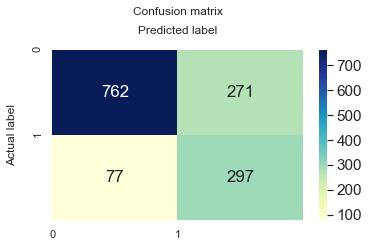

In [461]:
cm = confusion_matrix(y_test, y_pred) 

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu" )
sns.set(rc={'figure.figsize':(5,3)})
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

ROC (Receiver Operating Characteristic) graph scores between 0 and 1 where 0 stand for bad and 1 stands for good. The more the graph is in the top left corner, the better our prediction is. Our predictions seems to be reasonably good.

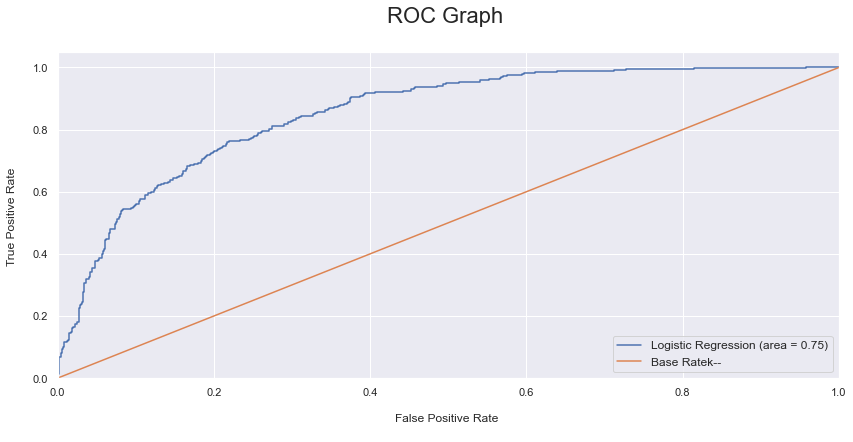

In [462]:
classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))
# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, 
label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

The key features can be seen below. If coef has a high positive value, it has a large positive correlation with churn rate, while if it has a large negative value, the model predicts a negative correlation with churn. 

In [463]:
feature_importances = pd.concat([pd.DataFrame(X_processed.columns, columns = ["features"]),
                                 pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])], axis = 1)
feature_importances.sort_values("coef", ascending = False)

,features,coef
2,TotalCharges,0.744454
33,Contract_Month-to-month,0.610782
13,InternetService_Fiber optic,0.360847
38,PaymentMethod_Electronic check,0.260368
4,SeniorCitizen,0.209244
24,TechSupport_No,0.175728
15,OnlineSecurity_No,0.168744
32,StreamingMovies_Yes,0.102066
29,StreamingTV_Yes,0.101261
18,OnlineBackup_No,0.084700


# Model Improvement

## Hyperparameter tuning

In [473]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('classifier' , LogisticRegression())])
param_grid = {'classifier__penalty' : ['l1', 'l2'],
              'classifier__C' : np.logspace(-4, 4, 6),
              'classifier__solver' : ['liblinear']}
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [474]:
print(best_clf.best_params_)

{'classifier__C': 251.18864315095823, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


In [475]:
classifier = LogisticRegression(C=251.18864315095823, penalty='l2', solver='liblinear', random_state = 0, class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Evaluate Model Results on Test Set:
auc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression',auc, acc, prec, rec, f1, f2]],
                       columns = ['Model', 'ROC AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)

                 Model   ROC AUC  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  0.766856  0.754087   0.524735  0.794118  0.631915   

   F2 Score  
0  0.720175  


We can see that all of our metrics improved (only Recall stayed the same) due to our parameter tuning:
ROC AUC: 0.765887->0.766372, Accuracy: 0.752665->0.753376, Precision: 0.522887->0.52381, Recall: 0.794118->0.794118, F1 score: 0.630573->0.631243, F2 score: 0.719477->0.719825.

## Removing features

According to manual visualization, correlation heatmap, and feature importance calculation, gender was one of the least significant feature when predicting churn. Let us remove this feature.

In [538]:
X_dropped = X_processed.copy()
features_to_drop = ['gender']
X_dropped.drop(features_to_drop, axis=1, inplace=True)

In [539]:
X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(X_dropped, y, stratify=y, test_size = 0.2, random_state = 0)

In [541]:
classifier = LogisticRegression(C=251.18864315095823, penalty='l2', solver='liblinear', random_state = 0, class_weight='balanced')
classifier.fit(X_train_dropped, y_train_dropped)

# Predict the Test set results
y_pred_dropped = classifier.predict(X_test_dropped)

# Evaluate Model Results on Test Set:
auc = roc_auc_score(y_test_dropped, y_pred_dropped)
acc = accuracy_score(y_test_dropped, y_pred_dropped )
prec = precision_score(y_test_dropped, y_pred_dropped )
rec = recall_score(y_test_dropped, y_pred_dropped )
f1 = f1_score(y_test_dropped, y_pred_dropped )
f2 = fbeta_score(y_test_dropped, y_pred_dropped, beta=2.0)

results = pd.DataFrame([['Logistic Regression',auc, acc, prec, rec, f1, f2]],
                       columns = ['Model', 'ROC AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)

                 Model   ROC AUC  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  0.767708  0.754087   0.524648  0.796791  0.632696   

   F2 Score  
0  0.721899  


We can see, that almost all our metrics have increased. Only precision decreased a little, but our key metrics e.g. ROC AUC increased. (ROC AUC: 0.766856->0.767708, Accuracy: 0.754087->0.754087, Precision: 0.524735->0.524648, Recall: 0.794118->0.796791, F1 Score: 0.631915->0.632696, F2 Score: 0.720175->0.721899). Removing gender was a good idea.

Let us remove other irrelevant features according to our previous analysis that only cause noise. I will show only the results of my tryings.

# Final model evaluation

In [551]:
X_dropped = X_processed.copy()
features_to_drop = ['gender','OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
                    'DeviceProtection_No internet service', 'TechSupport_No internet service',
                    'StreamingTV_No internet service', 'StreamingMovies_No internet service',
                    'OnlineSecurity_No', 'OnlineBackup_No',
                    'DeviceProtection_No', 'TechSupport_No',
                    'StreamingTV_No', 'StreamingMovies_No',
                    'PhoneService', 'PaymentMethod_Bank transfer (automatic)',
                    ]
X_dropped.drop(features_to_drop, axis=1, inplace=True)
X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(X_dropped, y, stratify=y, test_size = 0.2, random_state = 0)
classifier = LogisticRegression(C=251.18864315095823, penalty='l2', solver='liblinear', random_state = 0, class_weight='balanced')
classifier.fit(X_train_dropped, y_train_dropped)

# Predict the Test set results
y_pred_dropped = classifier.predict(X_test_dropped)

# Evaluate Model Results on Test Set:
auc = roc_auc_score(y_test_dropped, y_pred_dropped)
acc = accuracy_score(y_test_dropped, y_pred_dropped )
prec = precision_score(y_test_dropped, y_pred_dropped )
rec = recall_score(y_test_dropped, y_pred_dropped )
f1 = f1_score(y_test_dropped, y_pred_dropped )
f2 = fbeta_score(y_test_dropped, y_pred_dropped, beta=2.0)

results = pd.DataFrame([['Logistic Regression',auc, acc, prec, rec, f1, f2]],
                       columns = ['Model', 'ROC AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)

                 Model   ROC AUC  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  0.767708  0.754087   0.524648  0.796791  0.632696   

   F2 Score  
0  0.721899  


We can see, that our metrics did not improve further compared to removing gender, but at least we could get rid of 14 additional features.

Text(0.5, 3.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

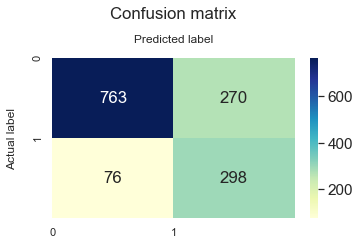

In [552]:
cm = confusion_matrix(y_test_dropped, y_pred_dropped) 

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu" )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

We managed to decrease both false negative and false positive cases by one: false negative changed from 77 to 76, false positive changed from 271 to 270.

In [554]:
feature_importances = pd.concat([pd.DataFrame(X_dropped.columns, columns = ["features"]),
                                 pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])], axis = 1)
feature_importances.sort_values("coef", ascending = False)

,features,coef
11,InternetService_Fiber optic,1.108213
2,TotalCharges,0.788618
19,Contract_Month-to-month,0.437884
18,StreamingMovies_Yes,0.437818
17,StreamingTV_Yes,0.434517
23,PaymentMethod_Electronic check,0.402791
3,SeniorCitizen,0.211782
4,Partner,0.053788
15,DeviceProtection_Yes,0.030369
22,PaymentMethod_Credit card (automatic),0.008474


Logistic regression coefficients need to be converted to regular odds for better understanding. This is done by exponentiating them: e^coef.

In [555]:
odds = np.exp(classifier.coef_[0])
pd.DataFrame(odds, 
             X_dropped.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
InternetService_Fiber optic,3.028941
TotalCharges,2.200354
Contract_Month-to-month,1.549425
StreamingMovies_Yes,1.549323
StreamingTV_Yes,1.544217
PaymentMethod_Electronic check,1.495994
SeniorCitizen,1.235878
Partner,1.055261
DeviceProtection_Yes,1.030835
PaymentMethod_Credit card (automatic),1.008510


If for example TotalCharges increases by one unit, the odds that the customers represented in the observation will churn are 2.20 times larger than they won't churn, when all other variables are held constants. For example InternetService_Fiber optic has only 2 values, 0 and 1, so this means that if people have fiber optic (value increases from 0 to 1), they are more likely to leave. On the other hand, if tenure increases by 1, the odds are 1/0.237353=4.2131 that they will not churn. We saw the same during our manual analysis: if people have been in the service for a while, they tend to stay even longer. 

If a feature with larger coefficient than 1, increases by one unit, the probability of churn increases. This odd is big for InternetService_Fiber optic and TotalCharges, and moderate for e.g. Contract_Month-to-month, StreamingMovies_Yes or SeniorCitizen. If a feature with smaller coefficient than 1 increases by one unit, the odds that a customer will not churn, increases. Features like InternetService_No, tenure, Contract_Two year or MonthlyCharges fall in this category. However, it is important to see, that there are features whose value is easier to be increased by one and there are features which are only True or False.

To summarize the project, I can say that I managed to build a useable model that can predict whether a customer is likely to churn or not with an acceptable precision. This knowledge is valuable for identifying current customers who are likely to churn and for analyzing the risk of future customers. It can be used to identify our target group who are more likely to be customers for a long time. Furthermore, I managed to identify important features that are worth being improved in order to decrease churn ratio.

Further possible improvement would be adding more data or features to our dataset, and more feature engineering: grouping some of the features or adding manually created features.